## Practical Activity: Create plots with Seaborn

1. Prepare the workstation

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
movies = pd.read_csv('~/Desktop/Data Analysis Course/Course 2/Week 4/LSE_DA201_Week_4_files/Data/movies.csv')
ott = pd.read_excel('~/Desktop/Data Analysis Course/Course 2/Week 4/LSE_DA201_Week_4_files/Data/ott.xlsx')

In [3]:
print(movies.shape)
movies.head()

(16744, 11)


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
print(ott.shape)
ott.head()

(16744, 5)


,ID,Netflix,Hulu,Prime Video,Disney+
0,1,0,0,1,0
1,2,0,1,0,0
2,3,0,0,1,0
3,4,1,0,0,0
4,5,0,0,1,0


In [5]:
# Merge the dataframes
movies_ott=pd.merge(movies, ott, how='left')
movies_ott.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
0,1,Inception,2010,13+,8.8,87%,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,0,0,1,0
1,2,The Matrix,1999,18+,8.7,87%,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,0,1,0,0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,0,0,1,0
3,4,Back to the Future,1985,7+,8.5,96%,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1,0,0,0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0,0,1,0


2. Create a count plot of most streamed movies by age and can I identify any areas netflix need to address?

<AxesSubplot:xlabel='Age', ylabel='count'>

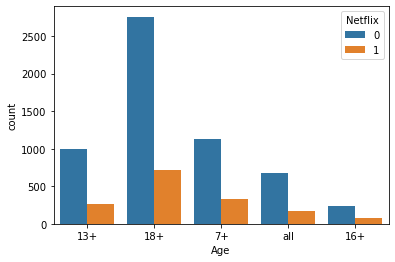

In [6]:
sns.countplot(x='Age', hue='Netflix', data=movies_ott)

3. Histogram create an IMDb ratings column


<AxesSubplot:xlabel='IMDb', ylabel='Count'>

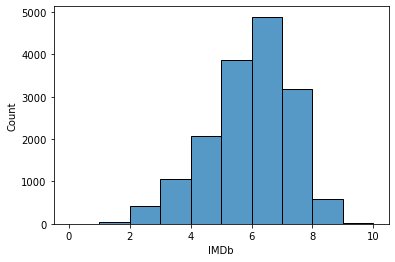

In [28]:
sns.histplot(x='IMDb', data=movies_ott, binwidth=1)

4. Create a scatterplot to display the correlation between Rotten Tomatoes & IMDb

<AxesSubplot:xlabel='Rotten Tomatoes', ylabel='IMDb'>

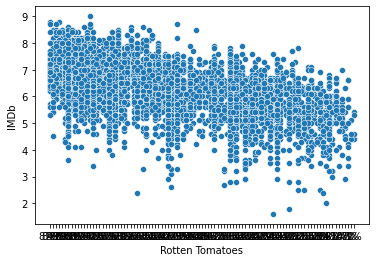

In [8]:
sns.scatterplot(x='Rotten Tomatoes',y='IMDb', data=movies_ott)

<AxesSubplot:xlabel='Age', ylabel='IMDb'>

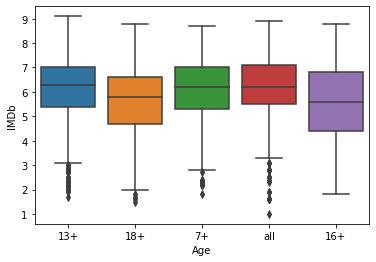

In [9]:
# Create a box plot of age vs IMDb to check for outliers
sns.boxplot(data=movies_ott, x='Age', y='IMDb')

Plot a lineplot comapring the release year and the IMDb rating

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

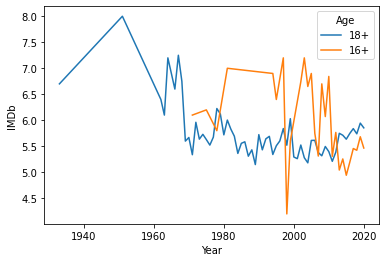

In [10]:
sns.lineplot(x='Year', y='IMDb', data=movies_ott[movies_ott['Age'].isin(['16+','18+'])],
            hue='Age', ci=None)

In [20]:
movies_ott_2010=movies_ott[movies_ott['Year']>=2010]
movies_ott_2010.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime,Netflix,Hulu,Prime Video,Disney+
0,1,Inception,2010,13+,8.8,87%,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,0,0,1,0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,0,0,1,0
5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0,0,0,1,0
7,8,Django Unchained,2012,18+,8.4,87%,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0,0,0,1,0
13,14,Room,2015,18+,8.1,93%,Lenny Abrahamson,"Drama,Thriller","Ireland,Canada,United Kingdom,United States",English,118.0,1,0,0,0


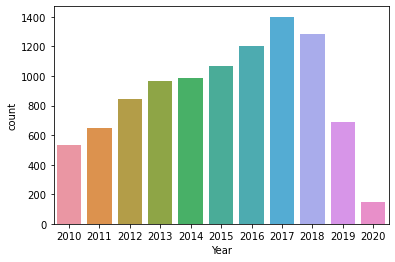

In [21]:
ax=sns.countplot(x='Year', data=movies_ott_2010)

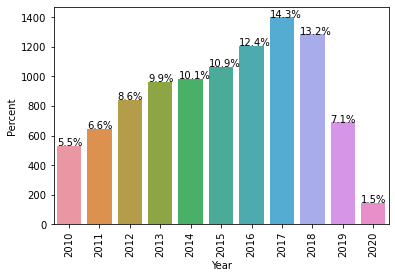

In [24]:
ax=sns.countplot(x='Year', data=movies_ott_2010)
ax.set(ylabel='Percent')

total = len(movies_ott_2010['Year'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x()
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))

plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Rotten Tomatoes', ylabel='IMDb'>

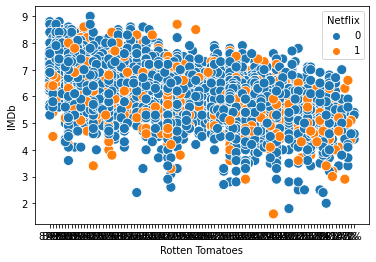

In [37]:
sns.scatterplot(x='Rotten Tomatoes',y='IMDb', data=movies_ott, hue='Netflix', s=100)


<AxesSubplot:xlabel='Age', ylabel='IMDb'>

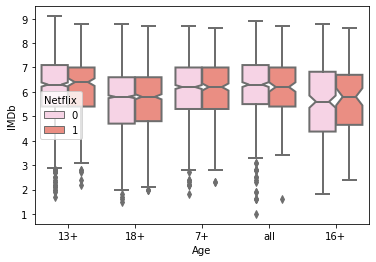

In [44]:
# Comapre to boxplot created earlier this notebook
sns.boxplot(data=movies_ott, x='Age', y='IMDb', linewidth=2, notch=True,
            hue='Netflix', palette= 'Set3_r', )

<AxesSubplot:xlabel='Year', ylabel='IMDb'>

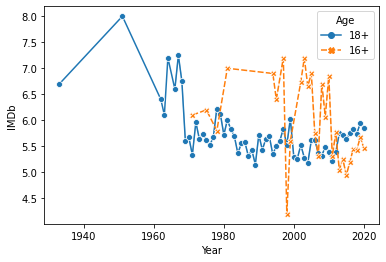

In [48]:
# Customise the previously created lineplot
sns.lineplot(x = 'Year', y = 'IMDb', 
             data=movies_ott[movies_ott['Age'].isin(['16+', '18+'])], 
             hue ='Age', style = 'Age', markers=True, ci=0)